In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
import emoji
from urlextract import URLExtract
from wordcloud import WordCloud
from collections import Counter
%matplotlib inline

In [2]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!
This is my clg group chat,it contains chats from 2018,so its a very big
file,will preview it after we've done adding regular expressions!

'''

f = open('WhatsApp Chat with Mini-project team-21.txt','r',encoding='utf-8')

data = f.read()



In [3]:
dummy = data.split('\n')
dummy

['19/10/2021, 21:57 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '22/10/2021, 19:08 - Shashidhar M3: Ok',
 '22/10/2021, 19:13 - Suhas: <Media omitted>',
 '23/10/2021, 01:18 - Suhas: Tomorrow bring print out if possible',
 '03/11/2021, 17:30 - Your security code with Shashidhar M3 changed. Tap to learn more.',
 '03/11/2021, 19:39 - Shashidhar M3: Ppt presentation etla  dude??',
 "03/11/2021, 19:53 - Suhas: Repu chedam I'll send references",
 '03/11/2021, 19:53 - Shashidhar M3: Ok👍🏻',
 '03/11/2021, 19:54 - Balakrishna M5: 👍👍',
 '03/11/2021, 19:55 - Suhas: <Media omitted>',
 '03/11/2021, 19:56 - Suhas: https://cran.r-project.org/web/packages/rwhatsapp/vignettes/Text_Analysis_using_WhatsApp_data.html',
 '03/11/2021, 19:58 - Suhas: https://www.analyticsvidhya.com/blog/2021/04/whatsapp-group-chat-analyzer-using-python/',
 '03/11/2021, 19:58 - Suhas: This 3 materials would be sufficient to make

In [4]:
'''
Example for dry run : '16/08/18, 20:09 - '

\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s

the first part "d{1,2}" this means here we can have one or 2 digits
then after we have "/"
then after we have "d{1,2}" again,same we can have one or 2 digits
then after we have "/"
then after we have "d{2,4}" here we check for 2 or more digits
then we have a space represented as "\s"
then we have hour representation it can take either one or 2 digits 
then we have a seperator ":" 
and the pattern repeats so on..

'''

# username and message in different col

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern,data)[1:]
print(len(messages))

## extracting dates as well in different col

dates = re.findall(pattern,data)
print(len(dates))

116
116


In [5]:
# this is a simple time string,we will appply this kind of transformation
# inorder to get the date and the time for our analysis

string = '16/08/18, 20:09 - '
string = string.split(',')
date,time = string[0],string[1]
time = time.split('-')
time = time[0].strip()
print(date+" and "+time)

16/08/18 and 20:09


In [6]:
# this function is to seperate the time and date

def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return date+" "+time




In [7]:
# creating a dataframe for messages and their dates

df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,19/10/2021 21:57
1,Shashidhar M3: Ok\n,22/10/2021 19:08
2,Suhas: <Media omitted>\n,22/10/2021 19:13
3,Suhas: Tomorrow bring print out if possible\n,23/10/2021 01:18
4,Your security code with Shashidhar M3 changed....,03/11/2021 17:30


In [8]:
df['user_messages']

0      Messages and calls are end-to-end encrypted. N...
1                                    Shashidhar M3: Ok\n
2                               Suhas: <Media omitted>\n
3          Suhas: Tomorrow bring print out if possible\n
4      Your security code with Shashidhar M3 changed....
                             ...                        
111       Suhas: There's GitHub link in the video down\n
112                    Suhas: Just make that code work\n
113         Suhas: By downloading all the requirements\n
114         Suhas: And whatsapp sentiment kuda combine\n
115                                Balakrishna M5: Okk\n
Name: user_messages, Length: 116, dtype: object

In [9]:
'''
if we observe the usermessage,we find that the 
username is attached with the user message,so i need to get rid
of this,for that i will use the concept of the regular expression

sample of the regular expression output

['', 'Suhas', 'By downloading all the requirements\n']


'''

users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

        
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
        
df['User'] = users
df['message'] = messages


def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})



df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. N...,19/10/2021 21:57,Group Notification
1,Ok,22/10/2021 19:08,Shashidhar M3
2,<Media omitted>,22/10/2021 19:13,Suhas
3,Tomorrow bring print out if possible,23/10/2021 01:18,Suhas
4,Your security code with Shashidhar M3 changed....,03/11/2021 17:30,Group Notification


In [10]:
df.shape

(116, 3)

In [11]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()


df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,19/10/2021 21:57,Group Notification,2021-10-19,2021,10,October,19,Tuesday,21,57
1,Ok,22/10/2021 19:08,Shashidhar M3,2021-10-22,2021,10,October,22,Friday,19,8
2,<Media omitted>,22/10/2021 19:13,Suhas,2021-10-22,2021,10,October,22,Friday,19,13
3,Tomorrow bring print out if possible,23/10/2021 01:18,Suhas,2021-10-23,2021,10,October,23,Saturday,1,18
4,Your security code with Shashidhar M3 changed....,03/11/2021 17:30,Group Notification,2021-03-11,2021,3,March,11,Thursday,17,30


In [12]:
df[df['User'] == 'Jagss']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute


In [13]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

629


In [14]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Ok',
 '<Media',
 'omitted>',
 'Tomorrow',
 'bring',
 'print',
 'out',
 'if',
 'possible',
 'Your',
 'security',
 'code',
 'with',
 'Shashidhar',
 'M3',
 'changed.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Ppt',
 'presentation',
 'etla',
 'dude??',
 'Repu',
 'chedam',
 "I'll",
 'send',
 'references',
 'Ok👍🏻',
 '👍👍',
 '<Media',
 'omitted>',
 'https://cran.r-project.org/web/packages/rwhatsapp/vignettes/Text_Analysis_using_WhatsApp_data.html',
 'https://www.analyticsvidhya.com/blog/2021/04/whatsapp-group-chat-analyzer-using-python/',
 'This',
 '3',
 'materials',
 'would',
 'be',
 'sufficient',
 'to',
 'make',
 'ppts',
 'and',
 'answer',
 'questions',
 'regarding',
 'the',
 'project',
 '<Media',
 'omitted>',
 'https://www.whoson.com/customer-service/top-te

In [15]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Jagss')].shape

(0, 11)

In [16]:
df['Message'].unique()

array(['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
       'Ok', '<Media omitted>', 'Tomorrow bring print out if possible',
       'Your security code with Shashidhar M3 changed. Tap to learn more.',
       'Ppt presentation etla  dude??',
       "Repu chedam I'll send references", 'Ok👍🏻', '👍👍',
       'https://cran.r-project.org/web/packages/rwhatsapp/vignettes/Text_Analysis_using_WhatsApp_data.html',
       'https://www.analyticsvidhya.com/blog/2021/04/whatsapp-group-chat-analyzer-using-python/',
       'This 3 materials would be sufficient to make ppts and answer questions regarding the project',
       'https://www.whoson.com/customer-service/top-ten-benefits-of-sentiment-analysis/',
       'https://generic.wordpress.soton.ac.uk/aura/2018/04/08/aura-advantages-and-challenges-of-social-media-and-sentiment-analysis/',
       'Abstract',
       'Your security code with Balakrishna M5 chan

In [17]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
2,<Media omitted>,22/10/2021 19:13,Suhas,2021-10-22,2021,10,October,22,Friday,19,13
9,<Media omitted>,03/11/2021 19:55,Suhas,2021-03-11,2021,3,March,11,Thursday,19,55
13,<Media omitted>,03/11/2021 20:05,Suhas,2021-03-11,2021,3,March,11,Thursday,20,5
20,<Media omitted>,05/11/2021 20:54,Balakrishna M5,2021-05-11,2021,5,May,11,Tuesday,20,54
21,<Media omitted>,05/11/2021 20:55,Balakrishna M5,2021-05-11,2021,5,May,11,Tuesday,20,55
29,<Media omitted>,05/11/2021 22:29,Suhas,2021-05-11,2021,5,May,11,Tuesday,22,29
32,<Media omitted>,05/11/2021 22:37,Suhas,2021-05-11,2021,5,May,11,Tuesday,22,37
35,<Media omitted>,05/11/2021 22:45,Suhas,2021-05-11,2021,5,May,11,Tuesday,22,45
43,<Media omitted>,06/11/2021 09:37,Balakrishna M5,2021-06-11,2021,6,June,11,Friday,9,37
45,<Media omitted>,06/11/2021 12:41,Suhas,2021-06-11,2021,6,June,11,Friday,12,41


In [18]:
df['User'].value_counts().head()

Suhas                 79
Balakrishna M5        20
Shashidhar M3          9
Group Notification     8
Name: User, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

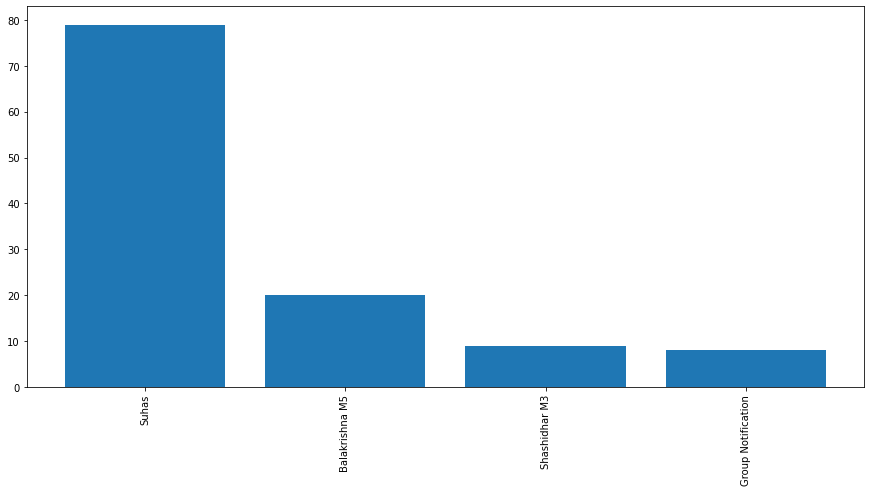

In [19]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


In [20]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'and': 15,
 '<Media': 14,
 'omitted>': 14,
 'the': 14,
 'to': 13,
 'Tap': 7,
 'learn': 7,
 'more.': 7,
 'code': 7,
 'with': 7,
 'this': 6,
 'Your': 6,
 'security': 6,
 'changed.': 6,
 'ppt': 6,
 'in': 6,
 'lo': 5,
 'we': 5,
 'will': 5,
 'Okk': 5,
 'presentation': 4,
 "I'll": 4,
 'project': 4,
 'prepare': 4,
 'for': 4,
 'inka': 4,
 'ante': 4,
 'are': 3,
 'Shashidhar': 3,
 'M3': 3,
 'send': 3,
 '👍👍': 3,
 'be': 3,
 'make': 3,
 'Balakrishna': 3,
 'M5': 3,
 'Nenu': 3,
 'morning': 3,
 'so': 3,
 'document': 3,
 'ani': 3,
 'all': 3,
 'topics': 3,
 'perfect': 3,
 'Haa': 3,
 'ga': 3,
 'from': 3,
 'ra': 3,
 'that': 3,
 'algorithms': 3,
 'libraries': 3,
 'vadtham': 3,
 'of': 2,
 'can': 2,
 'read': 2,
 'or': 2,
 'Ok': 2,
 'questions': 2,
 'because': 2,
 'you': 2,
 'your': 2,
 'both': 2,
 'handle': 2,
 'abstract': 2,
 'our': 2,
 'could': 2,
 'using': 2,
 '👍🏻': 2,
 'repu': 2,
 'laptop': 2,
 'oka': 2,
 'some': 2,
 'well': 2,
 'day': 2,
 'lekunte': 2,
 'manam': 2,
 'Arey': 2,
 'best': 2,
 'Sunday': 2,

In [21]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,and,15
1,<Media,14
2,omitted>,14
3,the,14
4,to,13
5,Tap,7
6,learn,7
7,more.,7
8,code,7
9,with,7


In [22]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,19/10/2021 21:57,Group Notification,2021-10-19,2021,10,October,19,Tuesday,21,57
1,Ok,22/10/2021 19:08,Shashidhar M3,2021-10-22,2021,10,October,22,Friday,19,8
2,<Media omitted>,22/10/2021 19:13,Suhas,2021-10-22,2021,10,October,22,Friday,19,13
3,Tomorrow bring print out if possible,23/10/2021 01:18,Suhas,2021-10-23,2021,10,October,23,Saturday,1,18
4,Your security code with Shashidhar M3 changed....,03/11/2021 17:30,Group Notification,2021-03-11,2021,3,March,11,Thursday,17,30
...,...,...,...,...,...,...,...,...,...,...,...
111,There's GitHub link in the video down,25/11/2021 12:52,Suhas,2021-11-25,2021,11,November,25,Thursday,12,52
112,Just make that code work,25/11/2021 12:52,Suhas,2021-11-25,2021,11,November,25,Thursday,12,52
113,By downloading all the requirements,25/11/2021 12:52,Suhas,2021-11-25,2021,11,November,25,Thursday,12,52
114,And whatsapp sentiment kuda combine,25/11/2021 12:52,Suhas,2021-11-25,2021,11,November,25,Thursday,12,52


In [23]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


,0,1
0,<media,14
1,omitted>,14
2,tap,7
3,learn,7
4,more.,7
5,code,7
6,ppt,7
7,security,6
8,changed.,6
9,nenu,5


In [24]:
def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
        
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    return emojidf


dfmoji = emojihelp('Overall',df)
dfmoji

,0,1
0,👍,9
1,🏻,5
2,🤦,2
3,♂,2
4,😂,2
5,✌,1
6,👏,1


In [25]:
dfmoji.columns = ['Emoji','Count']
dfmoji

,Emoji,Count
0,👍,9
1,🏻,5
2,🤦,2
3,♂,2
4,😂,2
5,✌,1
6,👏,1


In [26]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,19/10/2021 21:57,Group Notification,2021-10-19,2021,10,October,19,Tuesday,21,57
1,Ok,22/10/2021 19:08,Shashidhar M3,2021-10-22,2021,10,October,22,Friday,19,8
2,<Media omitted>,22/10/2021 19:13,Suhas,2021-10-22,2021,10,October,22,Friday,19,13
3,Tomorrow bring print out if possible,23/10/2021 01:18,Suhas,2021-10-23,2021,10,October,23,Saturday,1,18
4,Your security code with Shashidhar M3 changed....,03/11/2021 17:30,Group Notification,2021-03-11,2021,3,March,11,Thursday,17,30


In [27]:
'''
We want the count of messages month-wise,
so we will apply group by and then by 
adding reset_index() we will get the 
result in a dataframe format

then we will add the "Year and month columns" 
like "January-2018",so that to analyze the things become simple

'''


def monthtimeline(selecteduser,df):


    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    
    return temp

In [28]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,19/10/2021 21:57,Group Notification,2021-10-19,2021,10,October,19,Tuesday,21,57
1,Ok,22/10/2021 19:08,Shashidhar M3,2021-10-22,2021,10,October,22,Friday,19,8
2,<Media omitted>,22/10/2021 19:13,Suhas,2021-10-22,2021,10,October,22,Friday,19,13
3,Tomorrow bring print out if possible,23/10/2021 01:18,Suhas,2021-10-23,2021,10,October,23,Saturday,1,18
4,Your security code with Shashidhar M3 changed....,03/11/2021 17:30,Group Notification,2021-03-11,2021,3,March,11,Thursday,17,30


In [29]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2021,3,March,12
1,2021,4,April,1
2,2021,5,May,26
3,2021,6,June,21
4,2021,7,July,1
5,2021,8,August,3
6,2021,10,October,4
7,2021,11,November,24
8,2021,12,December,24


In [30]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2021,3,March,12
1,2021,4,April,1
2,2021,5,May,26
3,2021,6,June,21
4,2021,7,July,1
5,2021,8,August,3
6,2021,10,October,4
7,2021,11,November,24
8,2021,12,December,24


In [31]:
temp.shape

(9, 4)

In [32]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

'March-2021'

In [33]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

,Year,Month_num,Month,Message,Time
0,2021,3,March,12,March-2021
1,2021,4,April,1,April-2021
2,2021,5,May,26,May-2021
3,2021,6,June,21,June-2021
4,2021,7,July,1,July-2021
5,2021,8,August,3,August-2021
6,2021,10,October,4,October-2021
7,2021,11,November,24,November-2021
8,2021,12,December,24,December-2021


In [34]:
temp

,Year,Month_num,Month,Message,Time
0,2021,3,March,12,March-2021
1,2021,4,April,1,April-2021
2,2021,5,May,26,May-2021
3,2021,6,June,21,June-2021
4,2021,7,July,1,July-2021
5,2021,8,August,3,August-2021
6,2021,10,October,4,October-2021
7,2021,11,November,24,November-2021
8,2021,12,December,24,December-2021


In [35]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,19/10/2021 21:57,Group Notification,2021-10-19,2021,10,October,19,Tuesday,21,57
1,Ok,22/10/2021 19:08,Shashidhar M3,2021-10-22,2021,10,October,22,Friday,19,8
2,<Media omitted>,22/10/2021 19:13,Suhas,2021-10-22,2021,10,October,22,Friday,19,13
3,Tomorrow bring print out if possible,23/10/2021 01:18,Suhas,2021-10-23,2021,10,October,23,Saturday,1,18
4,Your security code with Shashidhar M3 changed....,03/11/2021 17:30,Group Notification,2021-03-11,2021,3,March,11,Thursday,17,30


In [36]:
temp1 = df['Day_name'].value_counts()

In [37]:
temp1

Thursday     31
Friday       28
Tuesday      27
Saturday     25
Wednesday     3
Sunday        2
Name: Day_name, dtype: int64

In [38]:
list(temp1.index)

['Thursday', 'Friday', 'Tuesday', 'Saturday', 'Wednesday', 'Sunday']

In [39]:
list(temp1.values)

[31, 28, 27, 25, 3, 2]

In [40]:
temp2 = df['Month'].value_counts()

In [41]:
temp2

May         26
November    24
December    24
June        21
March       12
October      4
August       3
April        1
July         1
Name: Month, dtype: int64

In [42]:
list(temp2.index),list(temp2.values)

(['May',
  'November',
  'December',
  'June',
  'March',
  'October',
  'August',
  'April',
  'July'],
 [26, 24, 24, 21, 12, 4, 3, 1, 1])

In [43]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [44]:
!pip install wordcloud

In [45]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [46]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message

In [47]:
data=[]
conversation='WhatsApp Chat with Mini-project team-21.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [48]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

C:\Users\suhas\AppData\Local\Temp/ipykernel_2492/1528190754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
C:\Users\suhas\AppData\Local\Temp/ipykernel_2492/1528190754.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
C:\Users\suhas\AppData\Local\Temp/ipykernel_2492/1528190754.py:9: SettingWithCopyWarning: 
A value is trying to be set on a co

,Date,Time,contact,Message,positive,negative,neutral
0,2021-10-22,19:08,Shashidhar M3,Ok,1.0,0.0,0.0
1,2021-10-22,19:13,Suhas,<Media omitted>,0.0,0.0,1.0
2,2021-10-23,01:18,Suhas,Tomorrow bring print out if possible,0.0,0.0,1.0
4,2021-03-11,19:39,Shashidhar M3,Ppt presentation etla dude??,0.0,0.0,1.0
5,2021-03-11,19:53,Suhas,Repu chedam I'll send references,0.0,0.0,1.0


In [49]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")

score(x,y,z)

Neutal


In [50]:
df.contact.unique()

array(['Shashidhar M3', 'Suhas', None, 'Balakrishna M5'], dtype=object)

In [51]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)

0


In [52]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [53]:
import regex
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(50)

,Date,Time,contact,Message,emoji
0,2021-10-22,19:08,Shashidhar M3,Ok,[]
1,2021-10-22,19:13,Suhas,<Media omitted>,[]
2,2021-10-23,01:18,Suhas,Tomorrow bring print out if possible,[]
3,2021-03-11,17:30,None,Your security code with Shashidhar M3 changed....,[]
4,2021-03-11,19:39,Shashidhar M3,Ppt presentation etla dude??,[]
5,2021-03-11,19:53,Suhas,Repu chedam I'll send references,[]
6,2021-03-11,19:53,Shashidhar M3,Ok👍🏻,[]
7,2021-03-11,19:54,Balakrishna M5,👍👍,[]
8,2021-03-11,19:55,Suhas,<Media omitted>,[]
9,2021-03-11,19:56,None,Suhas: https://cran.r-project.org/web/packages...,[]


In [54]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

There are 5067 words in all the messages.


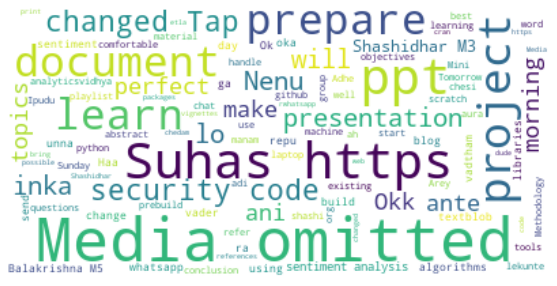

In [55]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
from textblob import TextBlob 
import matplotlib.pyplot as plt

In [57]:
!pip install textblob

In [58]:
from textblob import TextBlob 
import matplotlib.pyplot as plt

In [59]:
!pip install urlextract

In [60]:
import re
import pandas as pd
from urlextract import URLExtract
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import emoji

In [61]:
from textblob import TextBlob 
import matplotlib.pyplot as plt

In [62]:
f=open('WhatsApp Chat with Mini-project team-21.txt','r',encoding='utf-8')
pos,neu,neg=0,0,0
for line in f:
    chat=line.split('-')[0].split(':')[0]
    analysis=TextBlob(chat)
    val=analysis.sentiment.polarity
    if val>0:
        pos+=val
    elif val==0:
        neu+=1
    else:
        neg+=val
print(pos,neu,neg)

0 131 0


In [63]:
neg=abs(neg)
mylabels = ['positive chat','negative chat']
sizes = [pos,neg]

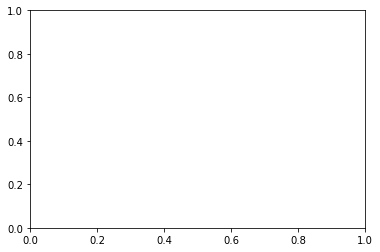

In [64]:
fig1, ax1 = plt.subplots()

In [65]:
ax1.pie(sizes ,labels=mylabels,autopct='%0.2f')

C:\Users\suhas\AppData\Local\Temp/ipykernel_2492/3760553388.py:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes ,labels=mylabels,autopct='%0.2f')


([<matplotlib.patches.Wedge at 0x259141a7d90>,
 [Text(1.1, 0.0, 'positive chat'), Text(1.1, 0.0, 'negative chat')],
 [Text(0.6, 0.0, '0.00'), Text(0.6, 0.0, '0.00')])

Text(0.5, 1.0, 'Whatsapp Sentiment Analysis')

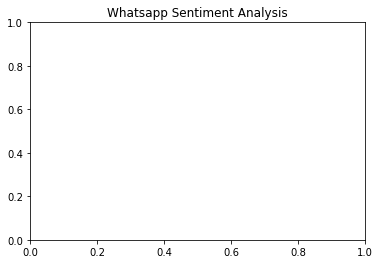

In [66]:
plt.title('Whatsapp Sentiment Analysis')

In [67]:
plt.show()

In [68]:
import re
import pandas as pd
from urlextract import URLExtract
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import emoji

In [69]:
def preprocess(data):
    pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

    messages = re.split(pattern, data)[1:]
    dates = re.findall(pattern, data)

    df = pd.DataFrame({'user_message': messages, 'message_date': dates})
    # convert message_date type
    df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

    df.rename(columns={'message_date': 'date'}, inplace=True)

    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])

    df['user'] = users
    df['message'] = messages
    df.drop(columns=['user_message'], inplace=True)

    df['only_date'] = df['date'].dt.date
    df['year'] = df['date'].dt.year
    df['month_num'] = df['date'].dt.month
    df['month'] = df['date'].dt.month_name()
    df['day'] = df['date'].dt.day
    df['day_name'] = df['date'].dt.day_name()
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute

    period = []
    for hour in df[['day_name', 'hour']]['hour']:
        if hour == 23:
            period.append(str(hour) + "-" + str('00'))
        elif hour == 0:
            period.append(str('00') + "-" + str(hour + 1))
        else:
            period.append(str(hour) + "-" + str(hour + 1))

    df['period'] = period

    return df

In [70]:
extract = URLExtract()

In [71]:
def fetch_stats(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    # fetch the number of messages
    num_messages = df.shape[0]

    # fetch the total number of words
    words = []
    for message in df['message']:
        words.extend(message.split())

    # fetch number of media messages
    num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]

    # fetch number of links shared
    links = []
    for message in df['message']:
        links.extend(extract.find_urls(message))

    return num_messages,len(words),num_media_messages,len(links)

In [72]:
def most_busy_users(df):
    x = df['user'].value_counts().head()
    df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})
    return x,df

In [73]:
def create_wordcloud(selected_user,df):

    f = open('stop_hinglish.txt', 'r')
    stop_words = f.read()

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    temp = df[df['user'] != 'group_notification']
    temp = temp[temp['message'] != '<Media omitted>\n']
    def remove_stop_words(message):
        y = []
        for word in message.lower().split():
            if word not in stop_words:
                y.append(word)
        return " ".join(y)
    wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
    temp['message'] = temp['message'].apply(remove_stop_words)
    df_wc = wc.generate(temp['message'].str.cat(sep=" "))
    return df_wc

In [74]:
def most_common_words(selected_user,df):

    f = open('stop_hinglish.txt','r')
    stop_words = f.read()

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    temp = df[df['user'] != 'group_notification']
    temp = temp[temp['message'] != '<Media omitted>\n']

    words = []

    for message in temp['message']:
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)

    most_common_df = pd.DataFrame(Counter(words).most_common(20))
    return most_common_df

In [75]:
def emoji_helper(selected_user,df):
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    emojis = []
    for message in df['message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

    emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

    return emoji_df

In [76]:
def monthly_timeline(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

    time = []
    for i in range(timeline.shape[0]):
        time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

    timeline['time'] = time

    return timeline

In [77]:
def daily_timeline(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    daily_timeline = df.groupby('only_date').count()['message'].reset_index()

    return daily_timeline

In [78]:
def week_activity_map(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    return df['day_name'].value_counts()

In [79]:
def month_activity_map(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    return df['month'].value_counts()

In [80]:
def activity_heatmap(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    user_heatmap = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

    return user_heatmap